In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install dgl mxnet

     |████████████████████████████████| 4.4 MB 31.7 MB/s 
     |████████████████████████████████| 49.1 MB 2.1 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
import cv2
import os
import glob
import numpy as np
import pandas as pd 
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
from multiprocessing.pool import Pool

import dgl
import matplotlib.pyplot as plt
import networkx as nx
import mxnet as mx
from mxnet import gluon
import torch
import numpy as np

from dgl.nn import GraphConv

Using backend: pytorch


In [3]:
img_size=224
def Resize(image):
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image,(img_size, img_size))
    return image

def Resize_images(filename):  
    imagemat = Resize(filename)
    cv2_imshow(imagemat)   
    cv2.imwrite('/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/step1_resize.jpg', imagemat) 

In [4]:
root = '/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/CXR_Reformat_Resize/test/virus/img-144.jpg'
# root_train = os.path.join(root, 'CXR', 'train') 
file_name = root

### Resize

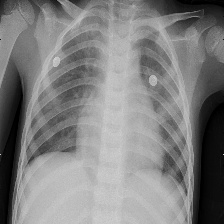

In [5]:
Resize_images(file_name)

### Preprocess

In [6]:
def Prewitt_v2(image): 
       image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)  
       image = cv2.resize(image, (512, 512)) 

       kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
       kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
       x = cv2.filter2D(image, cv2.CV_16S, kernelx)
       y = cv2.filter2D(image, cv2.CV_16S, kernely)
 
       absX = cv2.convertScaleAbs(x)
       absY = cv2.convertScaleAbs(y)
       Prewitt_v2 = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
       return Prewitt_v2
  
  
def converter_Prewitt_v2(filename): 
        imagemat = Prewitt_v2(filename)
        cv2_imshow(imagemat)   
        cv2.imwrite('/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/step2_v2_preprocess.jpg', imagemat)    
 
def convert_Prewitt_v2_all(filename):
    converter_Prewitt_v2(filename) 

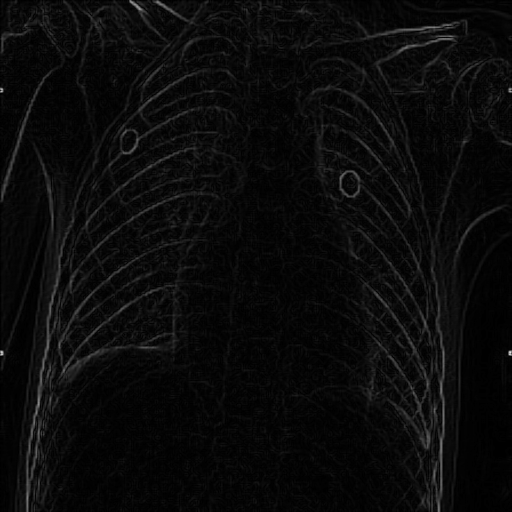

In [7]:
filename = '/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/step1_resize.jpg'
converter_Prewitt_v2(filename) 

### Construct graph

In [9]:
!pip install histocartography

     |████████████████████████████████| 80 kB 7.9 MB/s 
     |████████████████████████████████| 3.1 MB 50.8 MB/s 
     |████████████████████████████████| 3.0 MB 47.9 MB/s 
     |████████████████████████████████| 596 kB 62.7 MB/s 
  Created wheel for histocartography: filename=histocartography-0.2.1-py3-none-any.whl size=110103 sha256=926f91f275060768d4ffd8b7144993475f834161a5127dfad5e8256c28d48187
  Stored in directory: /root/.cache/pip/wheels/c1/76/34/5068a5cf9a9271680fdf3700e4be2159833f7270b96004f47f
Successfully built histocartography
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: dgl
    Found existing installation: dgl 0.6.1
    Uninstalling dgl-0.6.1:
      Successfully uninstalled dgl-0.6.1
ERROR: pip's de

In [8]:
from PIL import Image as Imagee
image_path = '/content/Original.jpeg'
canvas_image = np.array(Imagee.open(image_path))
# graph_image = np.array(Image.open('/content/step3_v2_preprocess.jpeg'))

Image type: bacterial
Pixel matrix is of: 224x224


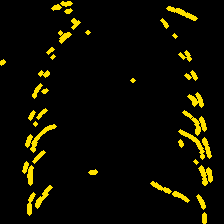

[1, 2, 3, 3, 4, 4, 6, 6, 7, 8, 5, 5, 9, 9, 9, 9, 10, 10, 10, 10, 15, 15, 16, 16, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 17, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 25, 24, 27, 28, 28, 28, 29, 29, 29, 31, 31, 32, 33, 33, 34, 34, 26, 26, 30, 30, 30, 35, 36, 37, 37, 38, 38, 39, 39, 40, 42, 42, 42, 41, 41, 41, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 50, 51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 55, 55, 56, 56, 58, 57, 57, 59, 59, 61, 60, 60, 64, 64, 62, 62, 62, 63, 63, 65, 65, 65, 66, 66, 67, 67, 68, 68, 69, 69, 70, 71, 72, 74, 75, 73, 76, 76, 77, 77, 77, 79, 79, 80, 80, 81, 78, 78, 78, 83, 82, 82, 82, 82, 84, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 92, 92, 88, 88, 88, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 95, 95, 95, 96, 96, 96, 96, 97, 97, 98, 98, 99, 100, 100, 101, 101, 102, 103, 104, 104, 106, 105, 105, 107,

NameError: ignored

<Figure size 1440x720 with 0 Axes>

In [11]:
from histocartography import visualization
from histocartography.visualization import OverlayGraphVisualization, InstanceImageVisualization
import numpy as np
from IPython.core.display import Image

#define globals required through out the whole program
edges           = [] #containing all edge tuple
attrs           = [] #countaining list of attribute of all nodes
graph_id        = 1 #id of latest graph
node_id         = 1 #id of latest node
graph_indicator = [] #containing graph-id for each node
node_labels     = [] #containing labels for all node
graph_labels    = []#containing labels for all graph

activity_map    = {}
activity_map[1] = 'bacterial'
activity_map[2] = 'normal'
activity_map[3] = 'virus'



def normalize(arr):
    arr = np.array(arr)
    m = np.mean(arr)
    s = np.std(arr)
    return (arr - m)/s

def generate_graphs(filename, node_label, activity_map): 
    global node_id, edges, attrs, graph_id, node_labels, graph_indicator
    cnt           = 0
    img           = cv2.imread(filename)
    img = cv2.resize(img, (224, 224)) 
    # IMAGE         = cv2.imread(filename)

    width, height = 224, 224
    IMAGE = np.zeros((height, width, 3), np.uint8)
    color = tuple(reversed((0, 0, 0)))
    IMAGE[:] = color

    dim1, dim2, _ = img.shape
    attrs1        = []

    print("Image type: " + activity_map[node_label] + "\nPixel matrix is of: " + str(dim1) + "x" + str(dim2))
    img1 = img.copy()
    nodes = np.full((dim1, dim2), -1)
    edge = 0
    for i in range(dim1):
        for j in range(dim2):
            b, _, _ = img[i][j]
            if 50 <= b <= 70:
                nodes[i][j] = node_id  
                attrs1.append(b)
                graph_indicator.append(graph_id)
                node_labels.append([node_label, activity_map[node_label]])
                node_id += 1
                cnt += 1
            else:
                img1[i][j] = 0
  
    list_node = {} 
    _src = [] 
    _des = [] 

    for i in range(dim1):
        for j in range(dim2):
            if(nodes[i][j] != -1):
                li, ri = max(0, i - 1), min(i + 2, dim1) 
                lj, rj = max(0, j - 1), min(j + 2, dim2)
                for i1 in range(li, ri):
                    for j1 in range(lj, rj):
                        if((i1 != i or j1 != j) and (nodes[i1][j1] != -1)):    
                            IMAGE = cv2.circle(IMAGE, (j, i), radius=0, color=(0, 225, 255), thickness=3) 
                            IMAGE = cv2.circle(IMAGE, (j1, i1), radius=0, color=(0, 225, 255), thickness=3)   

                            if (j, i) not in list_node: 
                                next = len(list_node) 
                                list_node[(j, i)] = next + 1
                                # list_node[(i, j)] = next + 1
                            
                            if (j1, i1) not in list_node: 
                                next = len(list_node) 
                                list_node[(j1, i1)] = next + 1
                                # list_node[(i1, j1)] = next + 1

                            _src.append(list_node[(j, i)])
                            _des.append(list_node[(j1, i1)])
                            # IMAGE = cv2.line(IMAGE, (j, i), (j1, i1), (255, 255, 0), 1) 
                            edges.append([nodes[i][j],nodes[i1][j1]])
                            edge += 1
    
    cv2_imshow(IMAGE) 
    def visualize(graph) -> None:
        options = {
            'node_color': 'blue',
            'node_size': 25,
            'width': 1,
            'font_color': 'white'
        }
        G = dgl.to_networkx(graph)
        pos = nx.kamada_kawai_layout(G)
        nx.draw(G, pos, with_labels=False, **options)

    cv2.imwrite('/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/step3_v2_preprocess.jpg', IMAGE) 
    print(_src) 
    print(_des)   
    plt.figure(figsize=(20, 10))
    g = dgl.graph(
                (_src, _des)
    # new_g = dgl.DGLGraph(g)
    print(f'G is DGLGraph ? -> {type(g) == dgl.DGLGraph}')
    print(f'Graph g = : {g}')
    # g = dgl.add_self_loop(g) 
    visualizer = OverlayGraphVisualization(
        instance_visualizer=InstanceImageVisualization(
            instance_style="filled+outline"
        )
    )
    viz_cg = visualizer.process(
        canvas=canvas_image,
        graph=g
    )
    # return -1
    viz_cg.show()
    print(g)
    visualize(g)
    attrs1=normalize(attrs1)
    attrs.extend(attrs1)
    del attrs1
    print("For given image nodes formed: " + str(cnt)+" edges formed: " + str(edge)) 
    graph_id += (cnt != 0)

def generate_graph_with_labels(filename, label, activity_map):  
    generate_graphs(filename, label, activity_map) 

generate_graph_with_labels('/content/drive/MyDrive/COURSES/CS331/FinalProject/dataset/GraphCXR/CXR - Collection/step2_v2_preprocess.jpg', 1, activity_map)

In [15]:
from histocartography.visualization import OverlayGraphVisualization, InstanceImageVisualization
from PIL import Image
import numpy as np

image_path = '/content/Original.jpeg'

visualizer = OverlayGraphVisualization(
    instance_visualizer=InstanceImageVisualization(
        instance_style="filled+outline"
    )
)
viz_cg = visualizer.process(
    canvas=np.array(Image.open(image_path)),
    graph=np.array(Image.open(image_path))
)
viz_cg.show()

NameError: ignored